In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
assets = ['HPT', 'MU']
data = pd.DataFrame()

for x in assets:
    data[x] = wb.DataReader(x, data_source='yahoo', start='2010-1-1')['Adj Close']

In [11]:
data.tail()

,HPT,MU
Date,,
2019-04-15,26.520000,41.820000
2019-04-16,26.420000,42.759998
2019-04-17,26.200001,43.150002
2019-04-18,26.350000,43.400002
2019-04-22,25.709999,43.400002


<module 'matplotlib.pyplot' from '/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

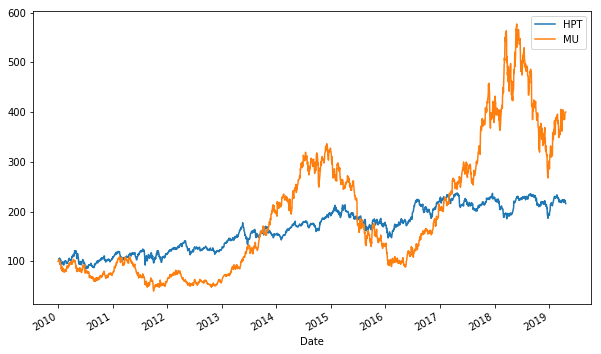

In [12]:
(data / data.iloc[0] * 100).plot(figsize = (10,6))
plt

In [14]:
returns = np.log(data / data.shift(1))

In [15]:
returns.mean() * 250

HPT    0.082249
MU     0.148172
dtype: float64

In [16]:
returns.cov()

,HPT,MU
HPT,0.000226,0.000169
MU,0.000169,0.000901


In [18]:
returns.corr()

,HPT,MU
HPT,1.000000,0.374594
MU,0.374594,1.000000


In [22]:
num_assets = len(assets)
num_assets

2

In [26]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)

In [37]:
weights

array([0.37646057, 0.62353943])

In [38]:
weights[1] + weights[0]

0.9999999999999999

In [44]:
portfolio_returns = []
portfolio_volatility = []

for v in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    portfolio_volatility.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights))))
    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)

In [46]:
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility': portfolio_volatility})

Text(0,0.5,'Expected Return')

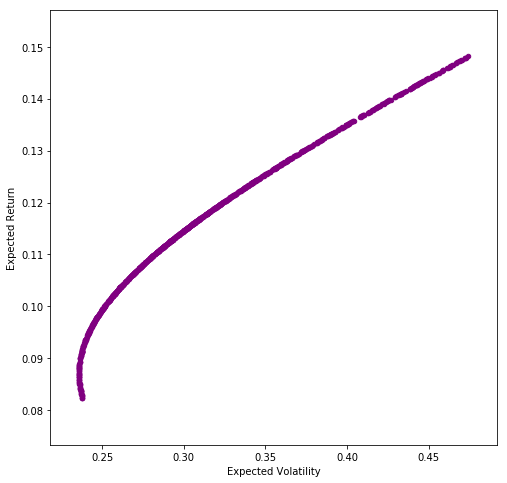

In [55]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(8, 8), color = 'purple');
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')